In [2]:
from llitelastic import *
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [47]:
param_optims = 112.31372046097945, 3.2815978953503064

In [49]:
k = calcula_un_llit(*param_optims)

100%|██████████| 120/120 [03:06<00:00,  1.56s/it]


In [50]:
cd /media/pau/Maxtor/Fisidabo final_v1/Codi/Fase2/Llit_Exemple

/media/pau/Maxtor/Fisidabo final_v1/Codi/Fase2/Llit_Exemple


In [51]:
np.save("Tensor", k[0])
np.save("X", k[1])
np.save("Z", k[2])

In [54]:
import pandas as pd
def llegeix_reals():
	df = pd.read_csv("../../Fase1/dadesllitreals.csv", header = None)
	df = df/100
	df = df[[4,5]]
	df = df[abs(df[4]) > 0.1]
	return df

In [55]:
df = llegeix_reals()

In [56]:
x_to_inter = k[1]
y_to_inter = k[2]
f = interp1d(x_to_inter, y_to_inter, kind='cubic') #Chill, no es una funcio cubica sino splines cubics
vec = [float(f(j)) for j in df[4]]
#resultat = np.linalg.norm(vec-df[5])
g = lambda h: np.linalg.norm(vec-(df[5]+h))

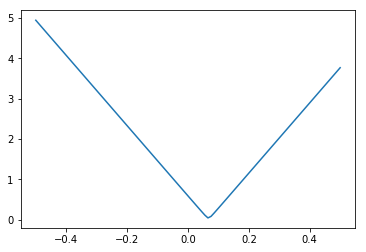

In [57]:
v = np.linspace(-0.5,0.5,100)
plt.plot(v,[g(i) for i in v])

In [81]:
df = df.sort_values(by = 4)
vec = [float(f(j)) for j in df[4]]

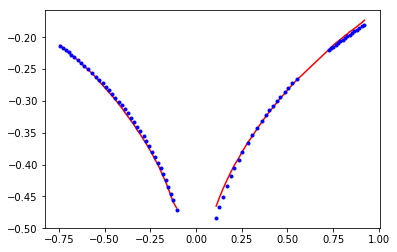

In [113]:
%matplotlib inline
N = 37
plt.plot(df[4][df[4]>0], (df[5]+scipy.optimize.minimize(g,0).x)[df[4]>0],'r')
plt.plot(df[4][df[4]<0], (df[5]+scipy.optimize.minimize(g,0).x)[df[4]<0],'r')
plt.plot(df[4][df[4]<0], np.array(vec)[df[4]<0], 'bo', markersize = 3)
plt.plot(df[4][df[4]>0], np.array(vec)[df[4]>0], 'bo', markersize = 3)

#plt.plot(df[4], vec)

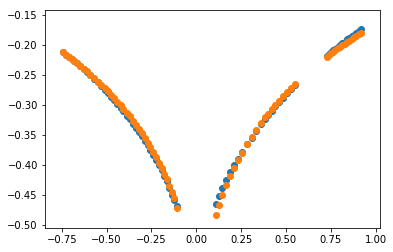

In [84]:
plt.scatter(df[4], df[5]+scipy.optimize.minimize(g,0).x)
plt.scatter(df[4], vec)

In [1]:
%matplotlib notebook
Pos = k[0]
#Plot del llit en 3D
# Plot the surface.
#PLOT A SURFACE
fig = plt.figure('Llit')
ax = fig.gca(projection='3d')

fig.suptitle("3D visualization of the optimal trampoline")
plt.xlabel("X (meters)")
plt.ylabel("Y (meters)")
ax.set_zlabel('Height (meters)')
ax.set_zlim(-1,0.1)

surf = ax.plot_surface(Pos[:,:,0], Pos[:,:,1], Pos[:,:,2], antialiased=True)
#plt.savefig("Llit estàtic Buit K20, 3D")

NameError: name 'k' is not defined